# Modeling conversion rates using convoys

https://erikbern.com/2019/08/05/modeling-conversion-rates-using-weibull-and-gamma-distributions.html

https://better.engineering/convoys/

In [1]:
from matplotlib import pyplot
import datetime
import pandas
import convoys.plotting
import convoys.utils

## Example 1. NYC Department of Buildings violations

### Loading data

In [2]:
%time df = pandas.read_pickle('https://github.com/better/convoys/raw/master/examples/dob_violations.pickle')

CPU times: user 860 ms, sys: 28 ms, total: 888 ms
Wall time: 2.04 s


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9715 entries, 747773 to 591599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   issue_date        9715 non-null   object  
 1   disposition_date  7192 non-null   object  
 2   now               9715 non-null   object  
 3   boro              9715 non-null   category
 4   category          9715 non-null   category
 5   type              9715 non-null   category
dtypes: category(3), object(3)
memory usage: 332.6+ KB


In [4]:
# make sure that all the data is before 2018
#print(max(df['issue_date']))
#print(sum(df['issue_date'] < datetime.date(2018, 1, 1)))
df = df[df['issue_date'] < datetime.date(2018, 1, 1)]

In [5]:
df.head()

,issue_date,disposition_date,now,boro,category,type
747773,2014-02-27,2014-09-23,2018-01-01,Brooklyn,V*-DOB VIOLATION - Resolved,E-ELEVATOR
1941892,2001-03-08,2002-09-26,2018-01-01,Brooklyn,V*-DOB VIOLATION - DISMISSED,LL1081-LOCAL LAW 10/81 - ELEVATOR
1451830,2007-11-07,2008-07-25,2018-01-01,Brooklyn,V*-DOB VIOLATION - Resolved,E-ELEVATOR
541229,1988-07-25,1989-06-08,2018-01-01,Manhattan,V*-DOB VIOLATION - DISMISSED,C-CONSTRUCTION
830086,1994-06-07,NaT,2018-01-01,Queens,V-DOB VIOLATION - ACTIVE,LL6291-LOCAL LAW 62/91 - BOILERS


### Converting to arrays

https://better.engineering/convoys/_modules/convoys/utils.html#get_arrays

* **unit** – string (optional), time unit to use when converting to numerical values. Has to be one of “years”, “days”, “hours”, “minutes”, or “seconds”. If not provided, then a choice will be made based on the largest time interval in the inputs.

In [6]:
# groups: coming from df.type, having more than 100 rows
# G: group assignment (np array of ints)
# B: conversion True/False (in this case, having non-null value in df.disposition_date)
# T: conversion time (in the unit of years) 

unit, groups, (G, B, T) = convoys.utils.get_arrays(
    df, groups='type', created='issue_date',
    converted='disposition_date',
    unit='years', group_min_size=100)

plotting kaplan-meier


/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/single.py:46: RuntimeWarning: divide by zero encountered in log
  self._vs.append(1 / numpy.log(prod_s_terms)**2 * sum_var_terms)
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/single.py:46: RuntimeWarning: invalid value encountered in double_scalars
  self._vs.append(1 / numpy.log(prod_s_terms)**2 * sum_var_terms)


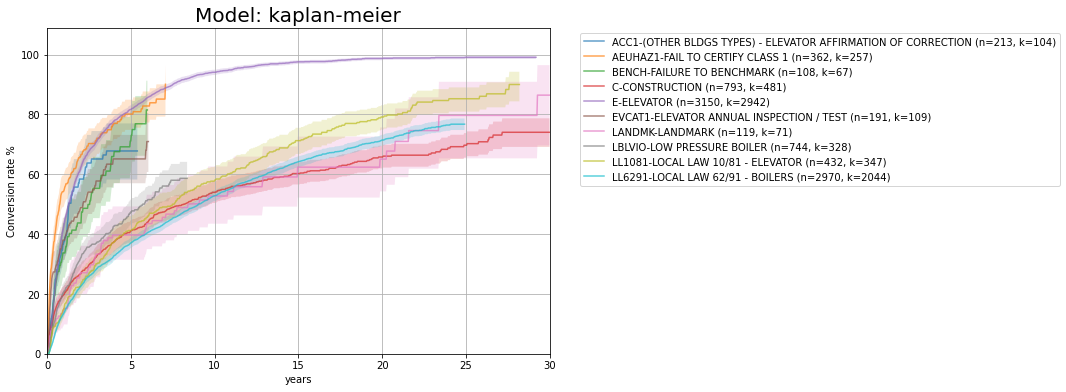

In [7]:
model = 'kaplan-meier'

print('plotting', model)
pyplot.figure(figsize=(9, 6))
convoys.plotting.plot_cohorts(G, B, T, model=model, ci=0.95,
                              groups=groups, t_max=30)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pyplot.xlabel(unit)
pyplot.title('Model: ' + model, fontsize=20)
pyplot.show()

/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/regression.py:198: UserWarning: Warning! Removed 4/9082 entries from inputs where T <= 0 or B not 0/1 or W < 0
  'T <= 0 or B not 0/1 or W < 0' % (n_removed, len(X)))
loss:     -24061.1587 |#                            | 1 [Elapsed Time: 0:00:00]/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/regression.py:36: RuntimeWarning: invalid value encountered in add
  + (k*p-1) * log(T) - (T*lambd)**p
loss:     -19333.2804 | #                           | 9 [Elapsed Time: 0:00:00]/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/regression.py:36: RuntimeWarn

plotting weibull


/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/regression.py:36: RuntimeWarning: invalid value encountered in subtract
  + (k*p-1) * log(T) - (T*lambd)**p
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/regression.py:50: RuntimeWarning: invalid value encountered in multiply
  W * (1 - B) * LL_censored, 0)
100% |###########################################| 130 walkers [ETA:  00:00:00]

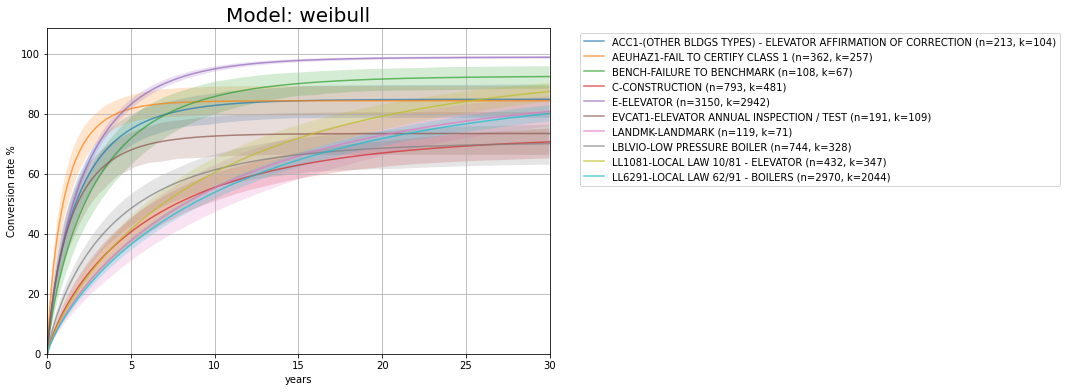

In [8]:
model = 'weibull'

print('plotting', model)
pyplot.figure(figsize=(9, 6))
convoys.plotting.plot_cohorts(G, B, T, model=model, ci=0.95,
                              groups=groups, t_max=30)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pyplot.xlabel(unit)
pyplot.title('Model: ' + model, fontsize=20)
pyplot.show()

/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/single.py:46: RuntimeWarning: divide by zero encountered in log
  self._vs.append(1 / numpy.log(prod_s_terms)**2 * sum_var_terms)
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/single.py:46: RuntimeWarning: invalid value encountered in double_scalars
  self._vs.append(1 / numpy.log(prod_s_terms)**2 * sum_var_terms)
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/regression.py:198: UserWarning: Warning! Removed 5/9373 entries from inputs where T <= 0 or B not 0/1 or W < 0
  'T <= 0 or B not 0/1 or W < 0' % (n_removed, len(X)))
loss:     -24473.6306 |#                            | 1 [Elapsed Time: 0:00:00]/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide 

Text(0.5, 0, 'years')

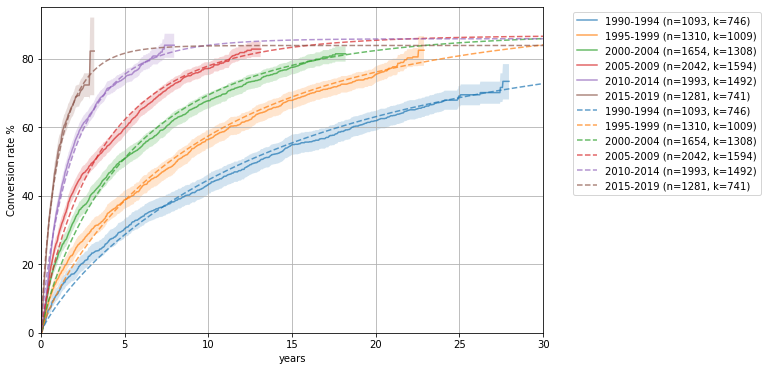

In [9]:
pyplot.figure(figsize=(9, 6))
df['bucket'] = df['issue_date'].apply(
    lambda d: '%d-%d' % (5*(d.year//5), 5*(d.year//5)+4)
)
unit, groups, (G, B, T) = convoys.utils.get_arrays(
    df, groups='bucket', created='issue_date',
    converted='disposition_date',
    unit='years', group_min_size=500)
convoys.plotting.plot_cohorts(G, B, T, model='kaplan-meier',
                              groups=groups, t_max=30, ci=0.95)
convoys.plotting.plot_cohorts(G, B, T, model='weibull',
                              groups=groups, t_max=30,
                              plot_kwargs={'linestyle': '--'})
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pyplot.xlabel(unit)



## Example 2. Age of marriage

### Loading data

In [10]:
%time df = pandas.read_pickle('https://github.com/better/convoys/raw/master/examples/marriage.pickle')

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 1.2 s


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 494135 to 108580
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   now       10000 non-null  int64   
 1   born      10000 non-null  int64   
 2   married   5841 non-null   float64 
 3   sex       10000 non-null  category
 4   race      10000 non-null  category
 5   hispanic  10000 non-null  category
 6   state     10000 non-null  category
dtypes: category(4), float64(1), int64(2)
memory usage: 352.1 KB


In [12]:
df.head()

,now,born,married,sex,race,hispanic,state
494135,2016,1997,NaN,Female,American Indian,Not Reported,California
595887,2016,1968,NaN,Male,African American,Not Reported,New Jersey
2557472,2016,1937,1955.0,Female,White,Not Reported,Tennessee
471086,2016,2007,NaN,Female,White,Not Reported,California
2116215,2016,1938,1966.0,Male,White,Not Reported,New York


### Converting to arrays

In [13]:
_, groups, (G, B, T) = convoys.utils.get_arrays(
    df, groups='sex', created='born', converted='married') # features=['race', 'hispanic', 'state'], 

/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/regression.py:198: UserWarning: Warning! Removed 105/10000 entries from inputs where T <= 0 or B not 0/1 or W < 0
  'T <= 0 or B not 0/1 or W < 0' % (n_removed, len(X)))
loss:     -33879.6052 |#                            | 1 [Elapsed Time: 0:00:00]/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/regression.py:36: RuntimeWarning: invalid value encountered in double_scalars
  + (k*p-1) * log(T) - (T*lambd)**p
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/convoys/regression.py:36: RuntimeWarning: invalid value encountered in multiply
  + (k*p-1) * log(T) -

Text(0.5, 0, 'Age of marriage')

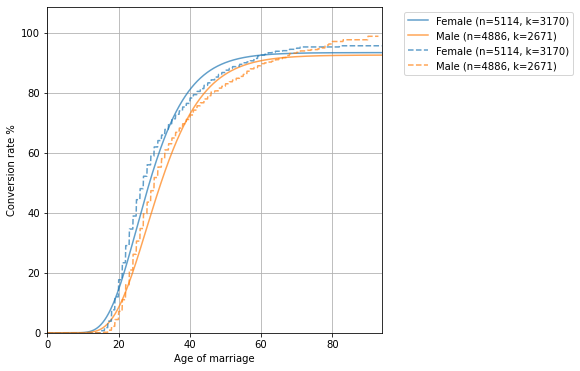

In [14]:
pyplot.figure(figsize=(6, 6))

convoys.plotting.plot_cohorts(G, B, T, model='generalized-gamma',
                              groups=groups)

convoys.plotting.plot_cohorts(G, B, T, model='kaplan-meier',
                              groups=groups,
                              plot_kwargs={'linestyle': '--'})

pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pyplot.xlabel('Age of marriage')